# **Lab 2.1 Image Enhancement with Math Operation**
This lab consists of two main subparts: Image Pixel Adjustment using Linear Equations and Gamma Equations.

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid
import os
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

Read an image using OpenCV (Use your own image).

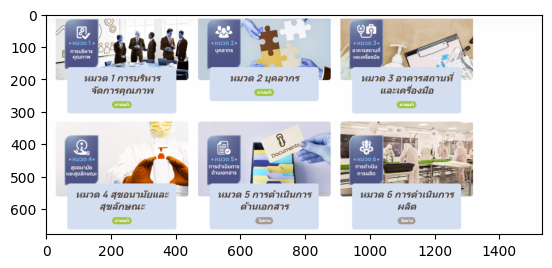

In [5]:
### START CODE HERE ###
img = cv2.imread("assets/test.png")


plt.imshow(img)
### END CODE HERE ###

## **Image Pixel Adjustment**

### Using Linear Equation
$$I_{new} = I \cdot a + b$$

Please perform at ***least 20 iterations*** with varying values of $a$ and $b$.
Assign the result of each iteration to an array.<br/>

In [7]:
### START CODE HERE ###
a = 0
b = 0
lin_result = []
for i in range(20):
    a = 0.5 + i * 0.05  # Vary a from 0.5 to 1.45
    b = -50 + i * 5     # Vary b from -50 to 45
    img_new = img.astype(np.float32) * a + b
    img_new = np.clip(img_new, 0, 255).astype(np.uint8)
    lin_result.append(img_new)




### END CODE HERE ###

Plot the images in a grid as shown below. Using `ImageGrid`.
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical
- The reference output used 40 iterations.

![image-2.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab2_Image-Enhancement/assets/1-1.png?raw=true)
</details>


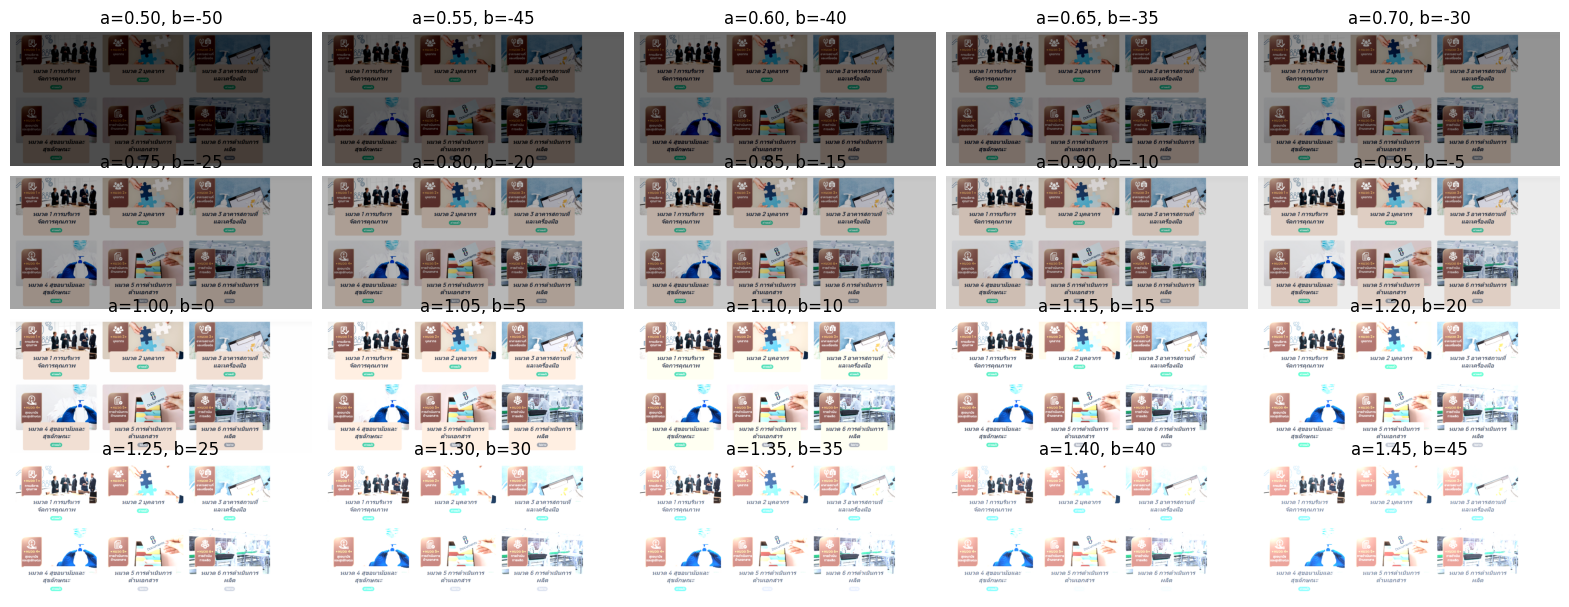

In [9]:
### START CODE HERE ###
fig = plt.figure(figsize=(20, 10))
grid = ImageGrid(fig, 111, nrows_ncols=(4, 5), axes_pad=0.1)

for i, ax in enumerate(grid):
    if i < len(lin_result):
        # Convert BGR to RGB for proper display
        img_rgb = cv2.cvtColor(lin_result[i], cv2.COLOR_BGR2RGB)
        ax.imshow(img_rgb)
        ax.set_title(f'a={0.5 + i * 0.05:.2f}, b={-50 + i * 5}')
        ax.axis('off')

plt.show()
### END CODE HERE ###

If you code work properly, the cell below should run without error.

In [ ]:
assert len(lin_result) >= 20, f"Expected more than or equal 20 iterations but got {len(lin_result)}"
for idx, result in enumerate(lin_result):
    assert result.shape == img.shape, f"Shape mismatch at index {idx}. Expected {img.shape} but got {result.shape}"
    assert result.dtype == np.uint8, f"Data type mismatch at index {idx}. Expected uint8 but got {result.dtype}"
    assert np.all((result >= 0) & (result <= 255)), f"Pixel value out of bounds at index {idx}"

Save the array of images to a video. Please complete the function below.

In [ ]:
### START CODE HERE ###
def write_images_to_video(image_array, output_file, frame_rate=30):
    pass
### END CODE HERE ###

Use `write_images_to_video()` and save the result.

In [ ]:
output_folder = "output"
os.makedirs(output_folder, exist_ok=True)

output_file =  os.path.join(output_folder, "output_linear.mp4")
write_images_to_video(lin_result,output_file)

Now use `matplotlib.animation` to display the animation from the images array.

In [ ]:
%%capture
### START CODE HERE ###


ani = animation.ArtistAnimation(None)
### END CODE HERE ###

<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![linear.gif](![<attachment:linear (2).gif>](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab2_Image-Enhancement/assets/linear.gif?raw=true))

</details>

In [ ]:
display(HTML(ani.to_jshtml()))

### Gamma Equation
$$I_{new} = I^{\gamma} \cdot a + b$$

Where $a$ is 1 and $b$ is 0. 
Please perform ***at least 10 iterations*** for 0 < $\gamma$ < 1 and another ***at least 10 iterations*** for $\gamma$ > 1
Assign the result of each iteration to an array.<br/>


In [ ]:
### START CODE HERE ###
a = 1
b = 0

gam_result = []

# First 10 iterations: gamma < 1 (0.1 to 0.91)
for i in range(10):
    gamma = 0.1 + i * 0.09  # Values from 0.1 to 0.91
    # Normalize image to [0,1], apply gamma, then scale back
    img_normalized = img.astype(np.float32) / 255.0
    img_gamma = np.power(img_normalized, gamma) * a + b
    img_gamma = np.clip(img_gamma * 255, 0, 255).astype(np.uint8)
    gam_result.append(img_gamma)

# Next 10 iterations: gamma > 1 (1.1 to 2.9)
for i in range(10):
    gamma = 1.1 + i * 0.2  # Values from 1.1 to 2.9
    # Normalize image to [0,1], apply gamma, then scale back
    img_normalized = img.astype(np.float32) / 255.0
    img_gamma = np.power(img_normalized, gamma) * a + b
    img_gamma = np.clip(img_gamma * 255, 0, 255).astype(np.uint8)
    gam_result.append(img_gamma)

### END CODE HERE ###

Plot the images in a grid as shown below. Using `ImageGrid`.
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image-2.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab2_Image-Enhancement/assets/1-2.png?raw=true)
</details>

In [ ]:
### START CODE HERE ###
fig = plt.figure(figsize=(20, 10))
grid = ImageGrid(fig, 111, nrows_ncols=(4, 5), axes_pad=0.1)

for i, ax in enumerate(grid):
    if i < len(gam_result):
        # Convert BGR to RGB for proper display
        img_rgb = cv2.cvtColor(gam_result[i], cv2.COLOR_BGR2RGB)
        ax.imshow(img_rgb)
        # Calculate gamma values (10 values < 1, then 10 values > 1)
        if i < 10:
            gamma_val = 0.1 + i * 0.09  # 0.1 to 0.91
        else:
            gamma_val = 1.1 + (i-10) * 0.2  # 1.1 to 2.9
        ax.set_title(f'γ={gamma_val:.2f}')
        ax.axis('off')

plt.show()
### END CODE HERE ###

In [ ]:
assert len(gam_result) >= 20, f"more than or equal 20 iterations but got {len(gam_result)}"
for idx, result in enumerate(gam_result):
    assert result.shape == img.shape, f"Shape mismatch at index {idx}. Expected {img.shape} but got {result.shape}"
    assert result.dtype == np.uint8, f"Data type mismatch at index {idx}. Expected uint8 but got {result.dtype}"
    assert np.all((result >= 0) & (result <= 255)), f"Pixel value out of bounds at index {idx}"

Use `write_images_to_video()` and save the result.

In [ ]:
output_folder = "output"
os.makedirs(output_folder, exist_ok=True)

output_file =  os.path.join(output_folder, "output_gamma.mp4")
write_images_to_video(gam_result,output_file)

Now use `matplotlib.animation` to display the animation from the images array.

In [ ]:
%%capture
### START CODE HERE ###


ani = animation.ArtistAnimation(None)
### END CODE HERE ###

<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![gamma2.gif](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab2_Image-Enhancement/assets/gamma.gif?raw=true)

</details>

In [ ]:
display(HTML(ani.to_jshtml()))

---

## **Questions**
1. If an image having over brightness or saturation, what would be possible solutions to enhance the image.
2. How can we make an image reverse intensity (black-to-white, white-to-black)? Explain the process

## **Answers**
1. Gamma Operation โดย 0 < gamma < 1
2. We use linear operation  Invert and we norm it with Quantization Equation


## **Answers By AI**
1. Use Gamma Operation with 0 < gamma < 1 to darken over-bright images, or adjust linear parameters (reduce 'a' or subtract 'b' in I_new = I·a + b)

2. Use image inversion with the formula: I_new = 255 - I (for 8-bit images). This subtracts each pixel value from the maximum intensity, reversing black↔white.